## Claude zero-shot example

Claude was given the following prompt:

> Assume I have a data file `data.csv` that has 257 columns. The first column, `type`, is a character vector indicating the type of each row. The remaining 256 columns are numerical feature vectors. Write python code that performs a t-SNE analysis of this data.

It produced this code:

Data shape: (500, 256)
Number of unique types: 5
Types distribution:
type
a    100
b    100
c    100
d    100
e    100
Name: count, dtype: int64
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 3.918611
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.853882
[t-SNE] KL divergence after 1000 iterations: 1.916417


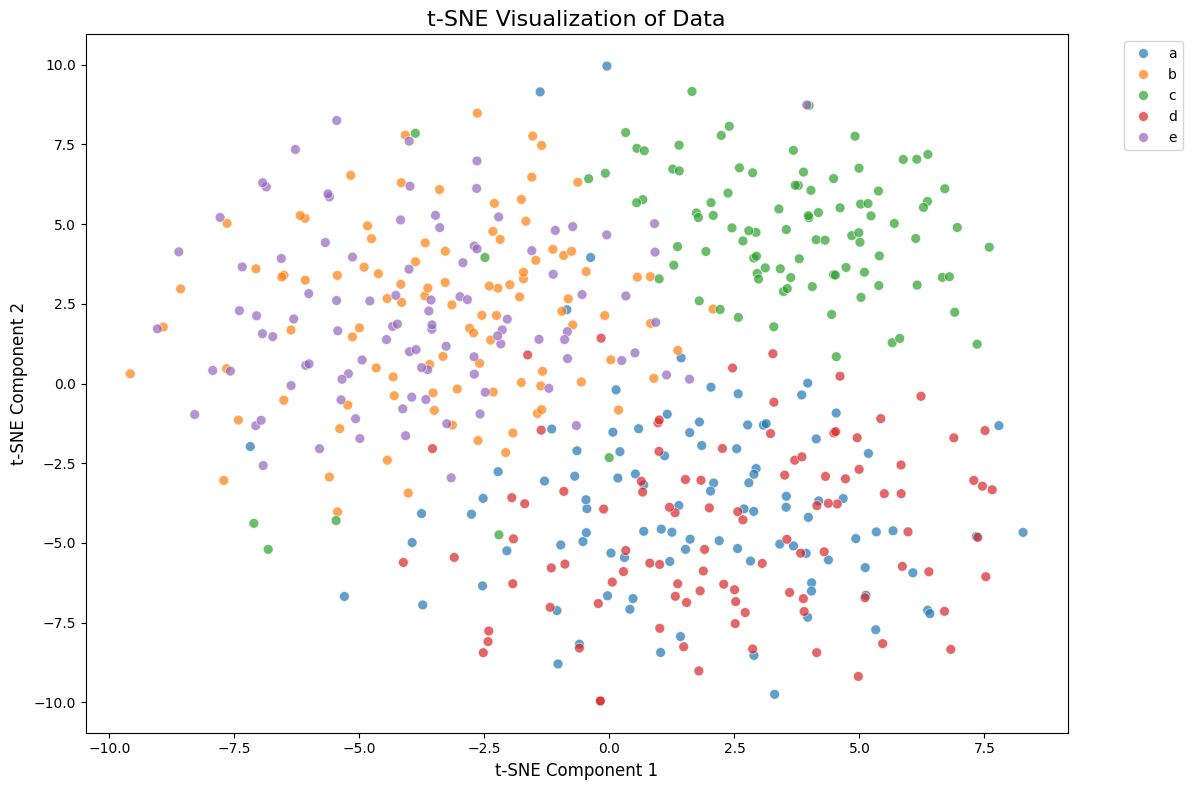


Results saved to 'tsne_results.csv'


In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data.csv')

# Separate the type column from the feature columns
types = df['type']
features = df.iloc[:, 1:]  # All columns except the first one

# Verify the shape
print(f"Data shape: {features.shape}")
print(f"Number of unique types: {types.nunique()}")
print(f"Types distribution:\n{types.value_counts()}")

# Perform t-SNE
# Note: You can adjust parameters as needed
tsne = TSNE(
    n_components=2,      # Reduce to 2 dimensions for visualization
    random_state=42,     # For reproducibility
    perplexity=30,       # Default; adjust based on dataset size
    max_iter=1000,       # Number of iterations
    verbose=1            # Show progress
)

# Fit and transform the features
tsne_results = tsne.fit_transform(features)

# Create a dataframe with t-SNE results
tsne_df = pd.DataFrame(
    data=tsne_results,
    columns=['tsne_1', 'tsne_2']
)
tsne_df['type'] = types.values

# Visualize the results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tsne_df,
    x='tsne_1',
    y='tsne_2',
    hue='type',
    palette='tab10',
    alpha=0.7,
    s=50
)
plt.title('t-SNE Visualization of Data', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('tsne_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Save the t-SNE results to a CSV file
tsne_df.to_csv('tsne_results.csv', index=False)
print("\nResults saved to 'tsne_results.csv'")